### Invalidating COSMOS 23.5 catalog entries that are already present in the 25.2 catalog

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from os.path import expanduser
from wlenet import config
import astropy.io.fits as pyfits
from multiprocessing import Pool, cpu_count

In [2]:
save_valid_indices = False

In [3]:
num_image_files = 57
rgc_path = '~/datasets/wlenet/cosmos/COSMOS_23.5_training_sample/real_galaxy_catalog_23.5.fits'
rgc_dir, rgc_file = os.path.split(os.path.expanduser(rgc_path))
fits_file = os.path.splitext(rgc_file)[0] + '_fits.fits'
rgc_catalog_235 = pyfits.getdata(os.path.join(rgc_dir, rgc_file))
fit_catalog_235 = pyfits.getdata(os.path.join(rgc_dir, fits_file))

In [4]:
num_image_files = 88
rgc_path = '~/datasets/wlenet/cosmos/COSMOS_25.2_training_sample/real_galaxy_catalog_25.2.fits'
rgc_dir, rgc_file = os.path.split(os.path.expanduser(rgc_path))
fits_file = os.path.splitext(rgc_file)[0] + '_fits.fits'
rgc_catalog_252 = pyfits.getdata(os.path.join(rgc_dir, rgc_file))
fit_catalog_252 = pyfits.getdata(os.path.join(rgc_dir, fits_file))

In [5]:
id_235 = rgc_catalog_235['IDENT']
id_252 = rgc_catalog_252['IDENT']

In [6]:
diff = set(id_235) - set(id_252)

In [7]:
id_to_ind_235 = dict(zip(id_235, range(len(id_235))))
id_to_ind_252 = dict(zip(id_252, range(len(id_252))))

In [8]:
diff_ind_235 = [id_to_ind_235[id] for id in diff] 

In [9]:
len(diff_ind_235)

31194

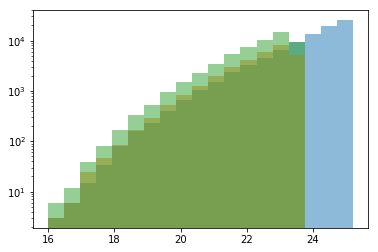

In [10]:
plt.hist(rgc_catalog_252['MAG'], bins=np.linspace(16,25.2,20), log=True, alpha=0.5);
plt.hist(rgc_catalog_235['MAG'][diff_ind_235], bins=np.linspace(16,25.2,20), log=True, alpha=0.5);
plt.hist(rgc_catalog_235['MAG'], bins=np.linspace(16,25.2,20), log=True, alpha=0.5);

In [11]:
if save_valid_indices:
    valid_indices = diff_ind_235
    valid_index_path = expanduser(config['calibration_path'] + '/cosmos_valid_indices_235.npy')
    np.save(valid_index_path, valid_indices)